In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv("bicycle/bicycle.csv")

In [6]:
print(train.shape)
print(train.head)

(210, 11)
<bound method DataFrame.head of      Unnamed: 0                 Date                  Day  High Temp (°F)  \
0             0  2016-04-01 00:00:00  2016-04-01 00:00:00            78.1   
1             1  2016-04-02 00:00:00  2016-04-02 00:00:00            55.0   
2             2  2016-04-03 00:00:00  2016-04-03 00:00:00            39.9   
3             3  2016-04-04 00:00:00  2016-04-04 00:00:00            44.1   
4             4  2016-04-05 00:00:00  2016-04-05 00:00:00            42.1   
5             5  2016-04-06 00:00:00  2016-04-06 00:00:00            45.0   
6             6  2016-04-07 00:00:00  2016-04-07 00:00:00            57.0   
7             7  2016-04-08 00:00:00  2016-04-08 00:00:00            46.9   
8             8  2016-04-09 00:00:00  2016-04-09 00:00:00            43.0   
9             9  2016-04-10 00:00:00  2016-04-10 00:00:00            48.9   
10           10  2016-04-11 00:00:00  2016-04-11 00:00:00            62.1   
11           11  2016-04-12 00:00:

In [7]:
print(train.columns)

Index([u'Unnamed: 0', u'Date', u'Day', u'High Temp (°F)', u'Low Temp (°F)',
       u'Precipitation', u'Brooklyn Bridge', u'Manhattan Bridge',
       u'Williamsburg Bridge', u'Queensboro Bridge', u'Total'],
      dtype='object')


In [8]:
train.describe()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,104.500000,60.580000,46.413333,2269.633333,4049.533333,4862.466667,3352.866667,14534.500000
std,60.765944,11.183223,9.522796,981.237786,1704.731356,1814.039499,1099.254419,5569.173496
min,0.000000,39.900000,26.100000,504.000000,997.000000,1440.000000,1306.000000,4335.000000
25%,52.250000,55.000000,44.100000,1447.000000,2617.000000,3282.000000,2457.000000,9596.000000
50%,104.500000,62.100000,46.900000,2379.500000,4165.000000,5194.000000,3477.000000,15292.500000
75%,156.750000,68.000000,50.000000,3147.000000,5309.000000,6030.000000,4192.000000,18315.000000
max,209.000000,81.000000,66.000000,3871.000000,6951.000000,7834.000000,5032.000000,23318.000000


In [9]:
print(train.Total.describe())

count      210.000000
mean     14534.500000
std       5569.173496
min       4335.000000
25%       9596.000000
50%      15292.500000
75%      18315.000000
max      23318.000000
Name: Total, dtype: float64


In [14]:
pos_min = train.Total.idxmin(axis=0, skipna=True)
total_min = train["Total"][pos_min]
high_temp = train["High Temp (°F)"][pos_min]
low_temp = train["Low Temp (°F)"][pos_min]
print("Total: ",total_min," Low temp: ",low_temp," High temp: ",high_temp)
pos_max = train.Total.idxmax(axis=0, skipna=True)
total_max = train["Total"][pos_max]
high_temp = train["High Temp (°F)"][pos_max]
low_temp = train["Low Temp (°F)"][pos_max]
print("Total: ",total_max," Low temp: ",low_temp," High temp: ",high_temp)

('Total: ', 4335, ' Low temp: ', 33.100000000000001, ' High temp: ', 44.100000000000001)
('Total: ', 23318, ' Low temp: ', 63.0, ' High temp: ', 71.099999999999994)


In [18]:
train['Avg Temp (°F)'] = train.apply(lambda row: (row["High Temp (°F)"] + row["Low Temp (°F)"])/2, axis=1)
train["Avg Temp (°F)"].head()

0    72.05
1    51.95
2    36.95
3    38.60
4    34.10
Name: Avg Temp (°F), dtype: float64

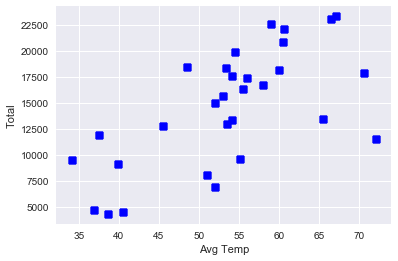

In [20]:
# Plot predictions
plt.scatter(train["Avg Temp (°F)"], train["Total"], c = "blue", marker = "s")
plt.xlabel("Avg Temp")
plt.ylabel("Total")
plt.show()

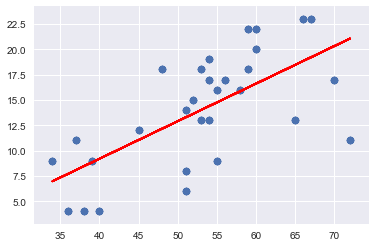

In [32]:
x = train.apply(lambda row: (int(row["Avg Temp (°F)"])), axis=1)
#x = train["Avg Temp (°F)"]
y = train["Total"]
fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
fig.show()